In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
from keras.datasets import fashion_mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 1s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28*28).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28*28).astype('float32')
# normalize
x_train = x_train / 255
x_test = x_test / 255
# one-hot encodeing
y_train_categorical = np_utils.to_categorical(y_train)
y_test_categorical = np_utils.to_categorical(y_test)
print(x_train.shape)
print(y_train.shape)
print(y_train_categorical.shape)

(60000, 784)
(60000,)
(60000, 10)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(input_dim = 28*28, units = 512, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(512, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(256, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(256, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))

opti = Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='categorical_crossentropy', optimizer=opti, metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
train_history = model.fit(x_train, y_train_categorical, batch_size=64, epochs=50, validation_data=(x_test, y_test_categorical))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 8s 128us/step - loss: 0.3186 - accuracy: 0.8833 - val_loss: 0.3454 - val_accuracy: 0.8728
Epoch 2/50
60000/60000 [==============================] - 7s 123us/step - loss: 0.3052 - accuracy: 0.8885 - val_loss: 0.3621 - val_accuracy: 0.8702
Epoch 3/50
60000/60000 [==============================] - 8s 126us/step - loss: 0.2938 - accuracy: 0.8914 - val_loss: 0.3906 - val_accuracy: 0.8601
Epoch 4/50
60000/60000 [==============================] - 8s 128us/step - loss: 0.2862 - accuracy: 0.8946 - val_loss: 0.3571 - val_accuracy: 0.8725
Epoch 5/50
60000/60000 [==============================] - 7s 118us/step - loss: 0.2744 - accuracy: 0.8986 - val_loss: 0.3721 - val_accuracy: 0.8699
Epoch 6/50
60000/60000 [==============================] - 8s 127us/step - loss: 0.2682 - accuracy: 0.8999 - val_loss: 0.3376 - val_accuracy: 0.8802
Epoch 7/50
60000/60000 [==============================] - 7s 1

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)              

In [ ]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'])
    plt.show()

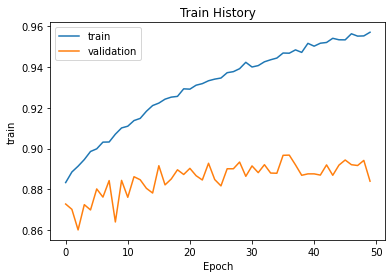

In [ ]:
show_train_history(train_history, 'accuracy','val_accuracy')

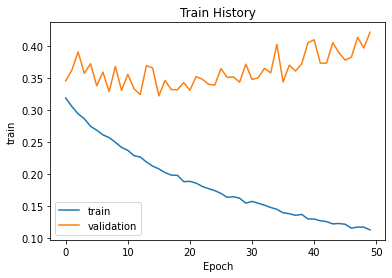

In [ ]:
show_train_history(train_history, 'loss','val_loss')

In [ ]:
scores = model.evaluate(x_test, y_test_categorical)
scores[1]

10000/10000 [==============================] - 1s 76us/step


0.8840000033378601

In [ ]:
import pandas as pd
prediction = model.predict_classes(x_test)

pd.crosstab(y_test, prediction, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,817,1,11,17,0,1,148,0,5,0
1,7,968,0,15,2,0,7,0,1,0
2,17,0,796,12,78,0,95,0,2,0
3,30,6,6,887,19,0,48,0,4,0
4,6,2,75,47,773,0,91,0,6,0
5,0,0,0,0,0,963,0,19,3,15
6,121,1,59,20,44,0,743,0,12,0
7,0,0,0,0,0,4,0,954,0,42
8,4,1,0,3,3,1,6,3,979,0


In [ ]:
# CNN的input shape要重新調整
x_train_cnn = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test_cnn = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam

filter_size = 128
model_CNN = Sequential()
model_CNN.add(Conv2D(filters=filter_size, input_shape=(28,28,1), kernel_size=(3,3), strides = (1, 1), activation="relu"))
model_CNN.add(BatchNormalization(axis=1))
model_CNN.add(Conv2D(filter_size, (3,3), activation="relu"))
model_CNN.add(BatchNormalization(axis=1))
model_CNN.add(Dropout(0.3))

model_CNN.add(Conv2D(2*filter_size, (3,3), activation="relu"))
model_CNN.add(BatchNormalization(axis=1))
model_CNN.add(Conv2D(2*filter_size, (3,3), activation="relu"))
model_CNN.add(BatchNormalization(axis=1))
model_CNN.add(MaxPooling2D((2,2)))
model_CNN.add(Dropout(0.3))

model_CNN.add(Flatten())
model_CNN.add(Dense(256, activation="relu"))
model_CNN.add(BatchNormalization())
model_CNN.add(Dense(256, activation="relu"))
model_CNN.add(BatchNormalization())
model_CNN.add(Dropout(0.3))
model_CNN.add(Dense(output_dim=10, activation="softmax"))
opti = Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model_CNN.compile(loss='categorical_crossentropy', optimizer=opti, metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`


In [ ]:
train_history_cnn = model_CNN.fit(x_train_cnn, y_train_categorical, batch_size=64, epochs=50, validation_data=(x_test_cnn, y_test_categorical))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 46s 772us/step - loss: 0.3788 - accuracy: 0.8629 - val_loss: 0.3124 - val_accuracy: 0.8888
Epoch 2/50
60000/60000 [==============================] - 46s 768us/step - loss: 0.2848 - accuracy: 0.8959 - val_loss: 0.2672 - val_accuracy: 0.9032
Epoch 3/50
60000/60000 [==============================] - 46s 772us/step - loss: 0.2453 - accuracy: 0.9103 - val_loss: 0.2644 - val_accuracy: 0.9042
Epoch 4/50
60000/60000 [==============================] - 46s 771us/step - loss: 0.2193 - accuracy: 0.9202 - val_loss: 0.2488 - val_accuracy: 0.9082
Epoch 5/50
60000/60000 [==============================] - 46s 765us/step - loss: 0.2022 - accuracy: 0.9254 - val_loss: 0.2355 - val_accuracy: 0.9129
Epoch 6/50
60000/60000 [==============================] - 46s 771us/step - loss: 0.1786 - accuracy: 0.9341 - val_loss: 0.2212 - val_accuracy: 0.9192
Epoch 7/50
60000/60000 [==============================] 

In [ ]:
model_CNN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
batch_normalization_5 (Batch (None, 26, 26, 128)       104       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       147584    
_________________________________________________________________
batch_normalization_6 (Batch (None, 24, 24, 128)       96        
_________________________________________________________________
dropout_3 (Dropout)          (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 256)       295168    
_________________________________________________________________
batch_normalization_7 (Batch (None, 22, 22, 256)      

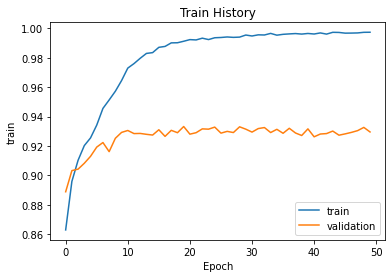

In [ ]:
show_train_history(train_history_cnn, 'accuracy','val_accuracy')

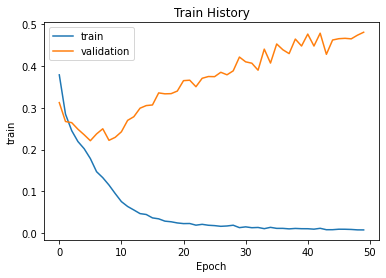

In [ ]:
show_train_history(train_history_cnn, 'loss','val_loss')

In [ ]:
scores = model_CNN.evaluate(x_test_cnn, y_test_categorical)
scores[1]

10000/10000 [==============================] - 3s 264us/step


0.9294999837875366

In [ ]:
import pandas as pd
prediction = model_CNN.predict_classes(x_test_cnn)

pd.crosstab(y_test, prediction, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,886,1,16,9,2,1,81,0,4,0
1,1,987,0,7,2,0,1,0,2,0
2,17,2,905,4,32,0,40,0,0,0
3,13,1,10,911,16,0,48,0,1,0
4,0,0,33,18,877,0,71,0,1,0
5,0,0,0,0,0,989,0,8,0,3
6,99,2,29,16,36,0,808,0,10,0
7,0,0,0,0,0,4,0,973,0,23
8,3,1,1,5,0,2,2,1,985,0
